<a href="https://www.kaggle.com/code/ramsesmdlc/mnist-classification?scriptVersionId=139577707" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# __0. Libraries__

In [13]:
#Import Libraries 

import numpy as np # linear algebra
import pandas as pd # data processing

import matplotlib as mpl # data visualization
import matplotlib.pyplot as plt # data visualization ("pyplot module", a.k.a. "plt")

    #Each "pyplot" function makes some change to a figure: e.g., creates a figure, creates a...
    #...plotting area in a figure, plots some lines in a plotting area, decorates the plot with...
    #...labels, etc. The various plots we can utilize using Pyplot are Line Plot, Histogram, Scatter,...
    #...3D Plot, Image, Contour, and Polar.

# __1. Important__

Type of machine learning system to build:

1. Supervised Learning: __Classification__
2. Batch Learning (also called "offline learning")
3. Model-based learning

Goal:
1. __It is to take an image of a handwritten single digit, and determine what that digit is.__

2. __Metric__: This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

# __2. Loading the Data - Training Dataset__

In [17]:
training_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

## __2.1. General Information__

1. The data file contain __gray-scale images__ of hand-drawn digits, from 0 through 9.

2. Each image is __28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.__

> __Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel__, with higher numbers meaning darker. 

> This pixel-value is an integer between 0 and 255, inclusive.

3. The __training data set, has 785 columns__. The first column, called "label", is the digit that was drawn by the user. The __rest of the columns contain the pixel-values of the associated image__.

4. __Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive__. 

> For example: To locate this pixel ("pixel31") on the image, "pixel31" indicates the pixel is in the fourth column from the left, and the second row from the top.

# __3. Exploratory Data Analysis (EDA) - Training Dataset__

In [42]:
def EDA(training_data):  
  # Print the "shape" of the dataframe
  print("\n" +'\033[1m','\033[94m',"Shape of the dataframe - some metric variables:",'\033[0m', training_data.shape, "\n")
    
  # Print the "keys" of the dataframe
  print('\033[1m','\033[94m',"Keys of the dataframe - some metric variables:",'\033[0m', "\n")
  print(training_data.keys())  
    
  # Print the "head" of the dataframe
  print('\033[1m','\033[94m',"Head of the dataframe - some metric variables:",'\033[0m', "\n")
  print(training_data.head())
  
  # Print the "general information" of the dataframe
  print("\n", '\033[1m','\033[94m',"Information of the dataframe - some metric variables:",'\033[0m', "\n")
  training_data.info()
 
  # Print the "number and percentage" of missing values per column" of some metric variables of the dataframe
  print("\n" +'\033[1m','\033[94m', "Number and percentage of missing values per column of some metric variables of the dataframe:", '\033[0m' + "\n")
  missing = training_data.isnull().sum()
  percent = missing / training_data.shape[0] * 100
  print(pd.concat([missing, percent], axis=1, keys=["Missing", "Percent"]))
    
# Call the function
EDA(training_data)


  Shape of the dataframe - some metric variables:  (42000, 785) 

  Keys of the dataframe - some metric variables:  

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
  Head of the dataframe - some metric variables:  

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0

## __3.1. Adjusting the Training Dataset__

1. If we want to see the data (as an image), we should consider what is described in the section "2.1. General Information" (i.e. the pixel of every number are displayed in one single row of 784 values); therefore, it is necessary rescaling the data (i.e. rescale each row from a shape of {1 x 784} to {28 x 28}.

2. Before applying the "reshape" function, we need to transform our dataset from "Pandas dataframe" to a "Numpy Array", because the "Numpy Array" has the function "reshape" available.

In [74]:
#Separating the Y and X values (i.e. dependent and independent variables)
Y_training, X_training = training_data["label"],training_data.iloc[:, 1:785] 

#Printing the "shape" of the dependent and independent variables (separately)
print(Y_training.shape)
print(X_training.shape)

#Printing the "type" of the dependent and independent variables (separately)
print(type(Y_training))
print(type(X_training))

#Transforming the the "independent variables" (from Dataframe to Numpy Array)
array_X = X_training.to_numpy()
print(array_X)

#Printing the "shape" of the independent variables (as a Numpy Array)
print(array_X.shape) 

(42000,)
(42000, 784)
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(42000, 784)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   1  25 130 155 254
 254 254 157  30   2   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   8 103 253 253 253 253 253 253 253 253 114   2   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  11 208 253 253 253
 253 253 253 253 253 253 253 107   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  31 253 253 253 253 253 253 253 253 253 253 253 215
 101   3   0   0   0   0   0   0   0   0   0   0   0   0  23 210 253 253
 253 248 161 222 222 246 253 253 253 253 253  39   

<function matplotlib.pyplot.show(close=None, block=None)>

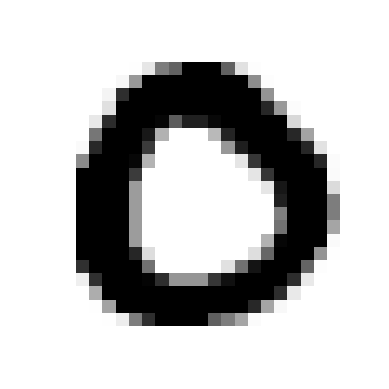

In [75]:
#Digit of row N°5, counting from 0,1,2,3,4 (without rescaling)
    #If we see the section "3. Exploratory Data Analysis (EDA) - Training Dataset", the output should
    #...be the number zero (0)
digitx = array_X[4]
print(digitx)

#Digit of row N°5 (with rescaling)
digitx_image = digitx.reshape(28, 28)

#The matplotlibe function "imshow":
    #Display data as an image, i.e., on a 2D regular raster.
    
    #The input may either be actual RGB(A) data, or 2D scalar data, which will be rendered as a pseudocolor image. For displaying a grayscale image set up the colormapping using the parameters cmap='gray', vmin=0, vmax=255.

The number of pixels used to render an image is set by the Axes size and the dpi of the figure. This can lead to aliasing artifacts when the image is resampled because the displayed image size will usually not match the size of X (see Image antialiasing). The resampling can be controlled via the interpolation parameter and/or rcParams["image.interpolation"] (default: 'antialiased').

plt.imshow(digitx_image,cmap="binary")
plt.axis("off")
plt.show 

# __4. Training and the Model - Training Dataset__